# Machine Learning Engineer Nanodegree
## Capstone Proposal
Pierre Foret 
December 7th, 2017

## Classification of hand written nevadagari characters 


### Domain Background

Hand written characters recognition is a popular challenge that has mutiple applications. From recognition of adresses on postals services to automatic reading for the visually impaires, this task has motivated a great number of researchers to find new ways of dealing with different kind of characters. For instance, digit recognition is one of the most studied version of this problem, and the MNIST database was used to get more than 99% of accuracy since the lates 90's (see http://yann.lecun.com/exdb/mnist/). 

Nowadays, techniques such as deep neural networks are sucessfully used on digits, the latin alphabet and chinese characters. We propose here to apply some of these techniques to the devanagari characters, used to write in India and Nepal.

### Problem Statement

Given a hand written set of characters, the algorithm should be able to assign each character to its class. The performance on this task can be measured in term of accuracy (how many characters were correctely classified), and should be applicable to different writers.


### Datasets and Inputs

The dataset used was published by Ashok Kumar on Kaggle (https://www.kaggle.com/ashokpant/devanagari-character-dataset). It contains samples of numerals (288 samples per class, 10 classes), vowels (221 samples per class, 12 classes) and consonants (205 samples per class, 36 classes). The samples were written by 40 different writters and cropped to be centered on each image. The images are in colors but the digits are all black on white paper. 

This dataset is quite small, and maybe we will need to perform transfer learning from models trained on other handwritten recognition databases. We especially look at the MNIST database, wich is very similar (comparable size and centered characters), with already well trained CNN avalaible that we might use.


### Solution Statement

A solution to this problem could be the following:

A script that takes a path to a picture of a hand written character and his type (vowel, numerals or consonants), and returns the name of the character. A sucess will correspond to returning the right name, and the performance can be measured in terms of accuracy. The solution should work for various writters and provide a reliable way to identify characters. 
We choose here to make a different model for each character type (vowels, consonants or numerals), to compare our results with the ones of the author of this dataset. A workflow to build these models would be like:

- For each dataset (numerals, consonants of vowels), we load the images with PIL (a script for that is available in this repository as `load_data.py`)
- We do some basic preprocessing of the images: converting the RGB images into shades of grey ones, and inverting the images (see more details in the _Project design_ section). Resizing the images is not needed here, as they all have the same dimensions.
- We convert the images to tensors so they can be used by Keras (with Tensorflow backend). We normalize the tensors to ease the training.
- We split the images into a training and a testing set (using sklean `train_test_split` is the most easy way)
- We choose a model and train it on the training dataset. The model will be a convolutionnal neural network, possibly pre-trained on the MNIST dataset (see the _Project design_ section for more details about the models).
- We test its accuracy on the testing set.
- At last, we wrap the model into a user-friendly function that take the path and the type of the character as an input and return its name (the function will do the same preprocessing step as we have and call the model)

### Benchmark Model

Several benchmarks are availables for this problem. The random guessing will perform really poorly because the characters are evenly distributed over a great number of classes. To counter that, I proposed a basic non deep learning model (SVC) that should established a more challenging benchark: (see https://github.com/PForet/Devanagari_recognition/blob/master/Benchmark.ipynb)
The accuracy of this model is 97% on the numerals characters, 91% on the vowels and 75% on the consonants. 

Another benchmark could be the results obtained by the author of this dataset. According to http://ieeexplore.ieee.org/document/6408440/, the author achieved an accuracy of 94.44% for numeral dataset, 86.04% for vowel dataset and 80.25% for consonant dataset.

As a conclusion, we can take the best accuracy of the two approach for our benchmark, that is:

- 97% for the numerals dataset
- 91% for the vowels dataset
- 80% for the consonants dataset.

### Evaluation Metrics

The performances listed above are given in term of acccuracy, wich is very well adapated here because our classes are evenly distributed.

### Project Design


#### Processing inputs

The dataset provided on Kaggle is already very clean. The characters are centered on the image, and all images are the same size (36x36 pixels). Some basic preprocessing steps were implemented in the `Benchmark` notebook:
- Encoding the images to true black and white (instead of black and white pictures encoded in RGB)
- Inverting the colors such as a non-null activation correspond to a stroke of the pencil.
- Optionnal (depends on the model chosed): Flattening the image into a vector and rescaling it.

The first two steps modify the images as followed:

Without pre-processing:





All data available
Raw consonants loaded, 7380 obs of 37 classes
Raw vowels loaded, 2652 obs of 13 classes
Raw numerals loaded, 2880 obs of 11 classes
Some unprocessed numerals:


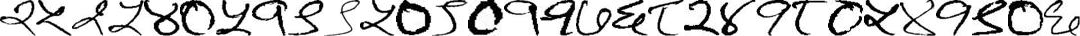

Some unprocessed vowels:


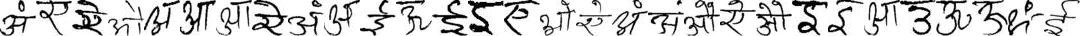

Some unprocessed consonants:


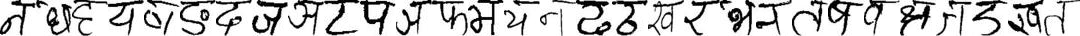

In [1]:
import load_data
from PIL import Image

consonants_img, consonants_labels = load_data.PIL_list_data('consonants')
vowels_img, vowels_labels = load_data.PIL_list_data('vowels')
numerals_img, numerals_labels = load_data.PIL_list_data('numerals')

from IPython.display import display
from numpy import concatenate
from random import sample
from PIL import Image

def display_some(img_list, n=30, to_sample=True):
    if to_sample: 
        img_list = sample(img_list,n)
    display(Image.fromarray(concatenate(img_list,axis=1)))
    
print("Some unprocessed numerals:")
display_some(numerals_img)
print("Some unprocessed vowels:")
display_some(vowels_img)
print("Some unprocessed consonants:")
display_some(consonants_img)

And with pre-processing:

Some inverted numerals:


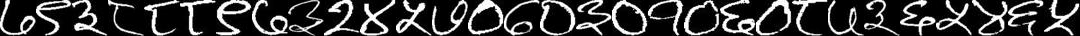

Some inverted vowels:


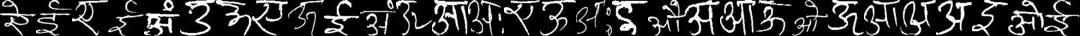

Some inverted consonants:


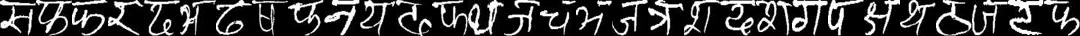

In [2]:
from PIL import ImageOps  

def pre_process(img_list):
    img_bw = [img.convert('LA') for img in img_list]
    return [ImageOps.invert(img) for img in img_list]

consonants_proc = pre_process(consonants_img)
vowels_proc = pre_process(vowels_img)
numerals_proc = pre_process(numerals_img)

print("Some inverted numerals:")
display_some(numerals_proc)
print("Some inverted vowels:")
display_some(vowels_proc)
print("Some inverted consonants:")
display_some(consonants_proc)

When working with Keras (https://keras.io) with Tensorflow backend, we will not need to flatten our images into vectors, so we will stick with these simple steps.

#### The model structure

The model will be a convolutionnal neural network (CNN) implemented with Keras. Several structures will be tested, as it is impossible to know now what will work better.

#### Training the model

The dataset is quite small: we have about 200 images for each of class of characters (280 for numerals). Training a CNN from scratch with this dataset will certainly be difficult. In addition to this, data augmentation would not work well because of the following:

- The characters are centered on the image (which is an advantage), so translation would not work. Putting the character into a bigger image so we can perform random translations will certainly make the problem even more difficult. Random zoom in/out would not work for the same reason.
- Mirroring is a non-sense for characters.
- Random small rotations would maybe be useful, but characters often have a precise orientation as one can see on the images above.

The key for a successful application of CNN in this problem possibly lies in transfer learning. A CNN trained on a much bigger but quite similar dataset, such as MNIST, would be a good candidate for this, because it would have been trained to recognize characters patterns such as straight or curved lines and angles. We note that the models trained on Imagenet (such as Inception, VGG16-19 and Resnet50) are too complex for characters recognition, as they were trained to discover much more complex patterns than useful for this task. Using these models would be to time consuming during the training and probably not very useful.

The first step for transfer learning would be to train a CNN on the MNIST database. This has been done and documented a lot of time (see https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py for instance). We should aim for at least 99.2% of accuracy (the accuracy achieved with the script linked). 

The structure of this model is the following (summary obtained with Keras):

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
__________

This model consist of two convolutionnal layers before a max_pooling one, a drop out layer before a flattening layer, and at last two dense layers with another drop out layer between them. This model will be trained on the MNIST database so the convolutionnal layers will be able to learn hand written characters related patterns.

We will then create a new CNN for the devanagari characters, using the trained convolutionnal layers of the MNIST model. It is worth noting that because we only use the convolutionnal layers, the images' dimensions don't have to match between the MNIST and the devanagari databases.

The structure of the CNN will be different for each dataset, because the number of classes is not the same for the numerals, the consonants and the vowels. We will keep the first five layers (the convolutionnal ones, the max pooling, the drop out and the flattening layers), but change the sizes of the three last. 

For instance, a model for the consonants (36 classes) could be the following:


In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(36,36,1), trainable=False))
model.add(Conv2D(64, (3, 3), activation='relu', trainable=False))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(36, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 34, 34, 32)        320       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 16384)             0         
_________________________________________________________________
dense_28 (Dense)             (None, 256)               4194560   
_________________________________________________________________
dropout_30 (Dropout)         (None, 256)               0         
__________

Where the convolutionnal layers have the sames weights as the ones from the MNIST model.


We will train these models on the devanagari datasets (splitted into a training/testing dataset) and compute their accuracy on the testing sets.

#### Analysis

We will try different structures of CNN and try to get the best accuracy. We will probably need to tune the size of each layer, and optimisation parameters such as the learning rate. We will compare this accuracy to the one obtained with the benchmark model, and see if CNN are really useful when we have a quite small dataset.

#### Wrap the model

At last, we will provide a user-friendly function, that will take as an argument a path to an image and the type of model to use (vowels, numerals or consonants), and will do the following steps:

- Preprocess the image and convert it to a tensor as specified above.
- Predict the class of the character using the suitable model.
- Display the character and its predicted type.

In [18]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')
